In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv
/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/349_IM-1697-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/607_IM-2196-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2832_IM-1249-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/699_IM-2263-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1931_IM-0602-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/947_IM-2442-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2932_IM-1335-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2303_IM-0882-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/291_IM-1313-2001.dcm.png
/kaggle

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

img = mpimg.imread('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1000_IM-0003-1001.dcm.png')
proj = pd.read_csv('/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv')
reports = pd.read_csv('/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv')
with open('/kaggle/input/labels-14/labels_14.pickle','rb') as myfile:
    labels = pickle.load(myfile)
img

array([[0.21568628, 0.1882353 , 0.1764706 , ..., 0.15686275, 0.15686275,
        0.15686275],
       [0.2       , 0.1882353 , 0.18039216, ..., 0.15686275, 0.15686275,
        0.15686275],
       [0.19607843, 0.18431373, 0.18039216, ..., 0.15686275, 0.15686275,
        0.15686275],
       ...,
       [0.41568628, 0.3882353 , 0.3764706 , ..., 0.87058824, 0.8745098 ,
        0.8901961 ],
       [0.5176471 , 0.47843137, 0.46666667, ..., 0.8901961 , 0.90588236,
        0.93333334],
       [0.5529412 , 0.52156866, 0.49019608, ..., 0.90588236, 0.92156863,
        0.9137255 ]], dtype=float32)

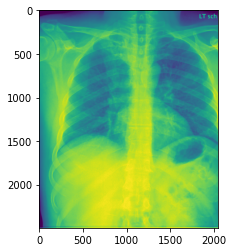

In [3]:
plt.imshow(img)
plt.show()

In [4]:
proj[0:10]

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
5,3,3_IM-1384-2001.dcm.png,Lateral
6,4,4_IM-2050-1001.dcm.png,Frontal
7,4,4_IM-2050-2001.dcm.png,Lateral
8,5,5_IM-2117-1003002.dcm.png,Frontal
9,5,5_IM-2117-1004003.dcm.png,Lateral


In [5]:
proj[proj.filename=='2_IM-0652-1001.dcm.png']

,uid,filename,projection
2,2,2_IM-0652-1001.dcm.png,Frontal


In [6]:
proj1 = proj.copy()
proj1['filename'] = ['CXR'+('-').join(elem.split('-')[0:2]) for elem in proj1.filename]
proj1['label'] = [np.argmax(labels[key]) if key in labels.keys() else None for key in proj1.filename]
proj1.head()

,uid,filename,projection,label
0,1,CXR1_IM-0001,Frontal,NaN
1,1,CXR1_IM-0001,Lateral,NaN
2,2,CXR2_IM-0652,Frontal,13.0
3,2,CXR2_IM-0652,Lateral,13.0
4,3,CXR3_IM-1384,Frontal,NaN


In [7]:
reports1 = reports.copy()
reports1 = reports1.set_index('uid')
reports1['label'] = proj1.groupby('uid').mean()
sum(list(reports1.label.value_counts()))

2954

In [8]:
# the only UID missing from the data
[key for key in labels.keys() if key not in list(proj1.filename)]

['CXR1_1_IM-0001']

Patient 343
label: 4


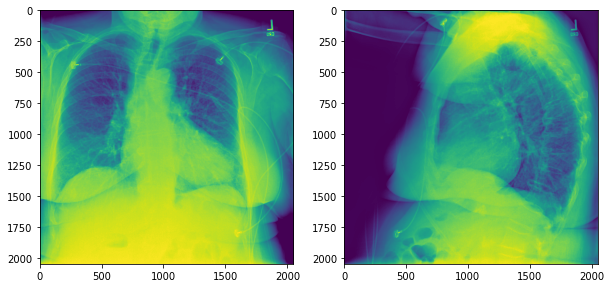

MeSH: Consolidation/lung;Bone Diseases, Metabolic;Airspace Disease/lung;Pulmonary Congestion/mild


In [22]:
idx, cntr = 30, 0 # index is based on the index of the label keys
print('Patient', list(proj1[proj1.filename==list(labels.keys())[idx]].uid)[0])
print('label:',np.argmax(labels[list(labels.keys())[idx]]))
idxs = list(proj1[proj1.filename==list(labels.keys())[idx]].index)
img_names = list(proj.iloc[idxs].filename)
fig, axes = plt.subplots(1,len(img_names), figsize=(5*len(img_names),5))
for img in img_names:
    disp_img = mpimg.imread('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/'+img)
    axes[cntr].imshow(disp_img)
    cntr+=1
plt.show()
print('MeSH:', reports[reports.uid==proj.iloc[idxs].uid.values[0]].MeSH.values[0])

# of classes: (14,)
# of samples: 2955


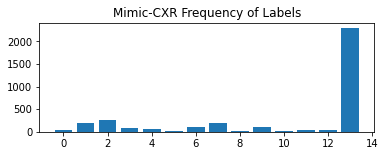

% of data with 14th label: 0.6640602374746597


In [10]:
print('# of classes:',list(labels.values())[0].shape)
# There appears to be 14 classes

print('# of samples:',len(list(labels.keys())))
# Nearly 3000 labels

import matplotlib.pyplot as plt
plt.figure(figsize=(6,2))
plt.bar(range(0, 14), sum(list(labels.values())))
plt.title('Mimic-CXR Frequency of Labels')
plt.show()

print('% of data with 14th label:',sum(list(labels.values()))[-1]/sum(sum(list(labels.values()))))